In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
dfD= pd.read_csv("CBS_2021-2023_Daily_Weather.csv")

In [90]:
dfD.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [91]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [92]:
dfD = dfD.rename(columns={'weathercode (wmo code)':'weather',
                       'apparent_temperature_mean (°C)':'Apparenttemp',
                       'temperature_2m_mean (°C)':'Temp',
                       'windspeed_10m_max (km/h)':'Windspeed',
                       'Day_of_Week':'Weekdays'})
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [93]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Casual        1095 non-null   int64  
 1   Date          1095 non-null   object 
 2   Member        1095 non-null   int64  
 3   Total_rides   1095 non-null   int64  
 4   Apparenttemp  1095 non-null   float64
 5   Temp          1095 non-null   float64
 6   weather       1095 non-null   int64  
 7   Windspeed     1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [94]:
dfD.isnull().sum()

Casual          0
Date            0
Member          0
Total_rides     0
Apparenttemp    0
Temp            0
weather         0
Windspeed       0
dtype: int64

In [95]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [96]:
# Convert the 'Date' column to datetime format
dfD['Date'] = pd.to_datetime(dfD['Date'])

# Extract Month and Year from the 'Date' column
dfD['Month'] = dfD['Date'].dt.month
dfD['Year'] = dfD['Date'].dt.year

dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021


In [97]:
# Add a new column with an index as a counting number
dfD['Count'] = dfD.index

dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4


In [98]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4


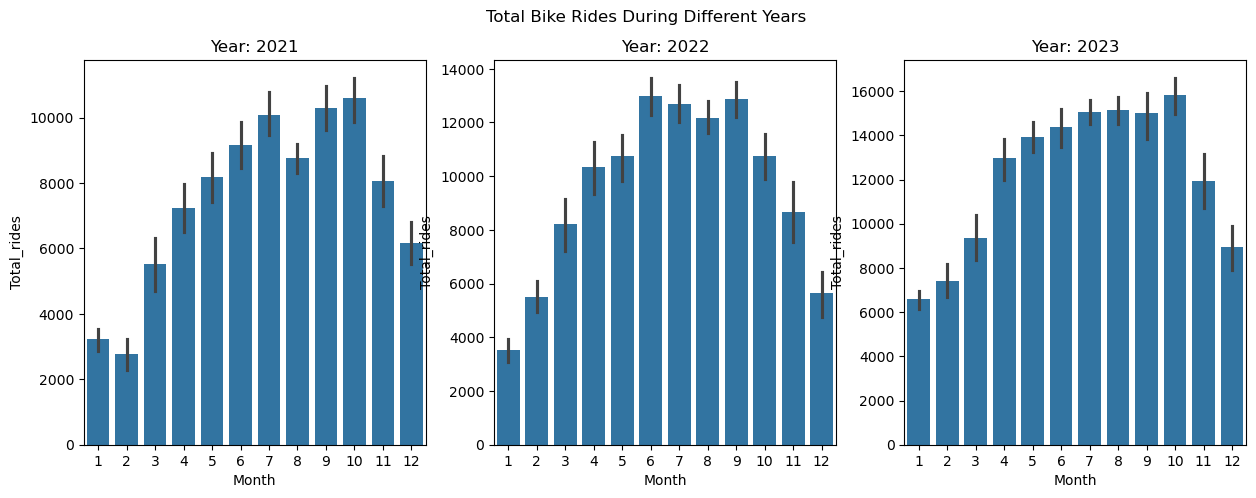

In [99]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Total Bike Rides During Different Years')

for i, year in enumerate(dfD['Year'].unique()):
    year_data = dfD[dfD['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


In [100]:
dfD.apply(lambda x: len(x.unique()))

Casual          1010
Date            1095
Member          1034
Total_rides     1042
Apparenttemp     398
Temp             350
weather           13
Windspeed        239
Month             12
Year               3
Count           1095
dtype: int64

In [101]:
# Convert Date to datetime format
dfD['Date'] = pd.to_datetime(dfD['Date'])

In [102]:
# Extract Day of Week
dfD['Weekdays'] = dfD['Date'].dt.dayofweek

In [103]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1


In [104]:
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

dfD['Weekdays'] = dfD['Weekdays'].map(days)

In [105]:
# Define a function to determine the season based on the month
def get_season(Month):
    if Month in [12, 1, 2]:
        return 'Winter'
    elif Month in [3, 4, 5]:
        return 'Spring'
    elif Month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfD['Season'] = dfD['Month'].apply(get_season)
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,Friday,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,Saturday,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,Sunday,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,Monday,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,Tuesday,Winter


In [106]:
dfD.drop(['Season', 'Weekdays'], axis=1, inplace=True)

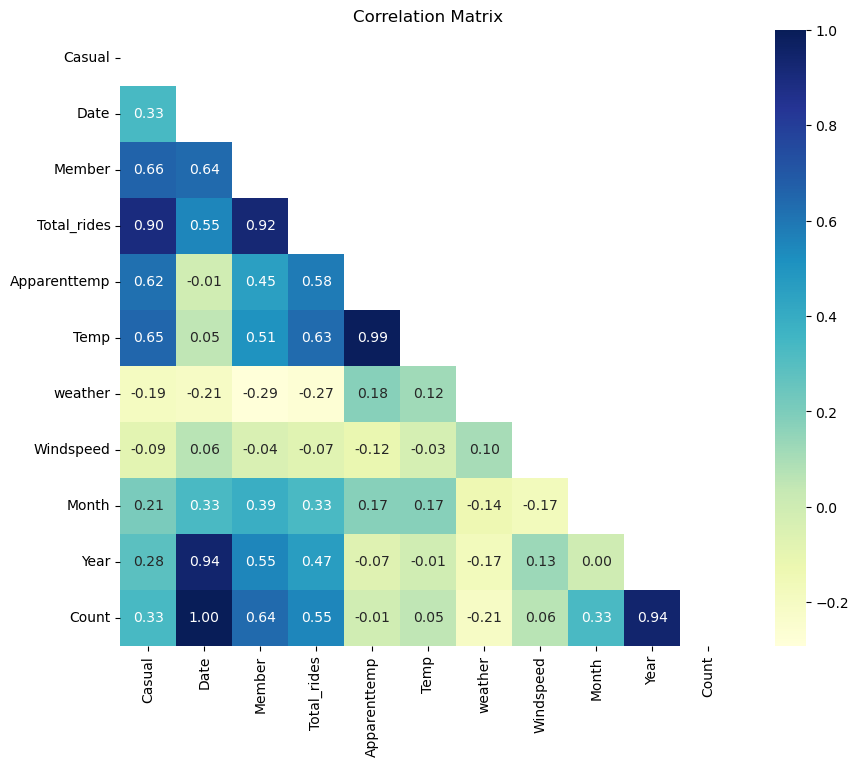

In [107]:
# Create a correlation matrix for red wine features
plt.figure(figsize=(10,8))
corr_matrix_Daily = dfD.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_Daily, dtype=bool))
sns.heatmap(corr_matrix_Daily, annot=True, cmap="YlGnBu",fmt= '.2f', square=True, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [108]:
import pandas as pd

# Convert 'Date' column to datetime format
dfD['Date'] = pd.to_datetime(dfD['Date'])
dfD['Weekdays'] = dfD['Date'].dt.dayofweek

# Define functions to categorize days
def is_weekday(day):
    return day < 5  # Monday to Friday (0-4)

def is_weekend(day):
    return day >= 5  # Saturday (5) and Sunday (6)

# Create new columns for 'is_weekday' and 'is_weekend'
dfD['is_weekday'] = dfD['Weekdays'].apply(is_weekday)
dfD['is_weekend'] = dfD['Weekdays'].apply(is_weekend)

holidays = ['2023-01-01', '2023-12-25']  # Example: New Year's Day, Christmas Day

# Create a Series of booleans indicating whether each date is a holiday
dfD['is_holiday'] = dfD['Date'].isin(pd.to_datetime(holidays))

# Calculate 'is_working_day'
dfD['is_working_day'] = dfD['is_weekday'] & ~dfD['is_holiday'] 

# Example usage:
weekend_data = dfD[dfD['is_weekend']]
working_day_data = dfD[dfD['is_working_day']]

print(weekend_data)
print(working_day_data)
dfD.head()

      Casual       Date  Member  Total_rides  Apparenttemp  Temp  weather  \
1       2874 2021-01-02    2844         5718           4.8   7.6       61   
2        495 2021-01-03    1133         1628           0.9   3.9       63   
8       1490 2021-01-09    2582         4072          -3.8   1.7        2   
9       1479 2021-01-10    2522         4001          -1.8   2.6        1   
15      1850 2021-01-16    2841         4691           0.6   4.3       53   
...      ...        ...     ...          ...           ...   ...      ...   
1080    2044 2023-12-17    3976         6020         -11.5  -7.4        0   
1086    2150 2023-12-23    4101         6251         -10.2  -6.1        1   
1087    1518 2023-12-24    2933         4451          -9.2  -5.2        1   
1093    3097 2023-12-30    4497         7594          -7.3  -2.9        1   
1094    2839 2023-12-31    4488         7327          -8.9  -4.6        0   

      Windspeed  Month  Year  Count  Weekdays  is_weekday  is_weekend  \
1 

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,is_weekday,is_weekend,is_holiday,is_working_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,True,False,False,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,False,True,False,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,False,True,False,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,True,False,False,True
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1,True,False,False,True


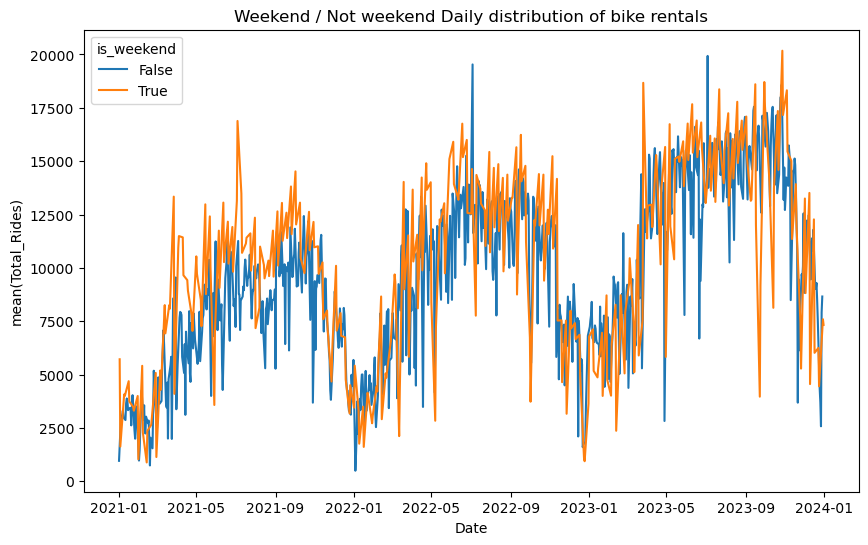

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.lineplot(x='Date', y='Total_rides', hue='is_weekend', data=dfD, estimator='mean')

# Add title and labels
plt.title('Weekend / Not weekend Daily distribution of bike rentals')
plt.xlabel('Date')
plt.ylabel('mean(Total_Rides)')

# Show the plot
plt.show()

In [110]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,is_weekday,is_weekend,is_holiday,is_working_day
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,True,False,False,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,False,True,False,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,False,True,False,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,True,False,False,True
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1,True,False,False,True


In [111]:
days

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [112]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfD['Season'] = dfD['Month'].apply(get_season)
dfD.head(3)

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,is_weekday,is_weekend,is_holiday,is_working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,True,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,False,True,False,False,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,False,True,False,False,Winter


In [113]:
dfD.isnull().sum()

Casual            0
Date              0
Member            0
Total_rides       0
Apparenttemp      0
Temp              0
weather           0
Windspeed         0
Month             0
Year              0
Count             0
Weekdays          0
is_weekday        0
is_weekend        0
is_holiday        0
is_working_day    0
Season            0
dtype: int64

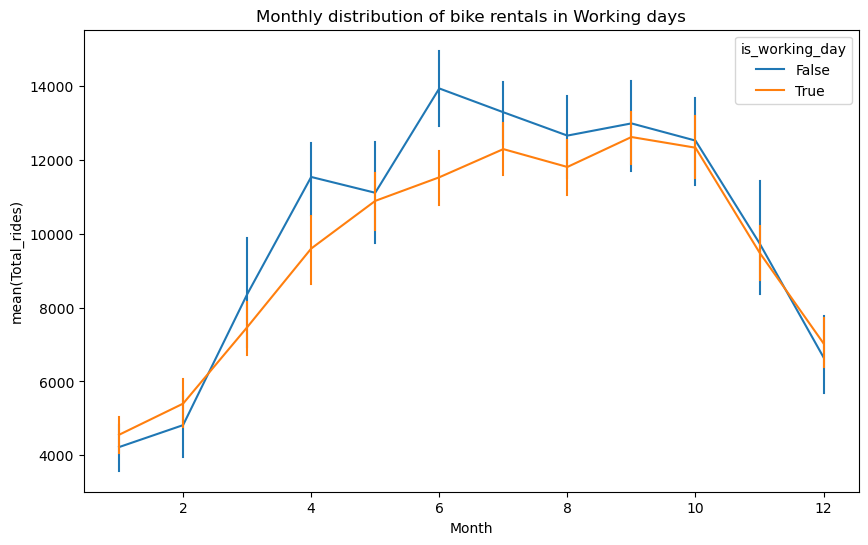

In [137]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.lineplot(x='Month', y='Total_rides', hue='is_working_day', data=dfD, estimator='mean',err_style="bars")

# Add title and labels
plt.title('Monthly distribution of bike rentals in Working days')
plt.xlabel('Month')
plt.ylabel('mean(Total_rides)')

# Show the plot
plt.show()

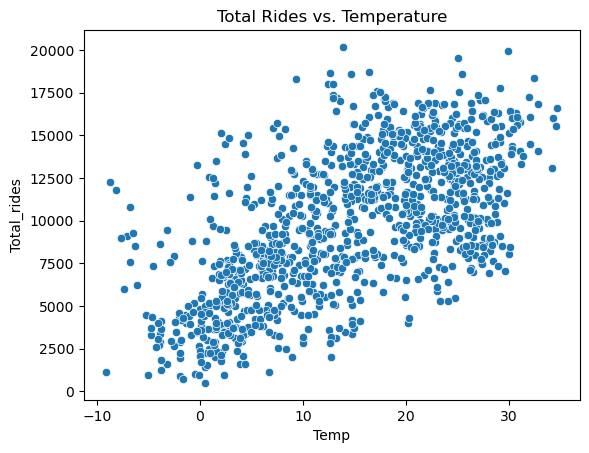

In [115]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Temperature')
plt.show()

<Figure size 640x480 with 0 Axes>

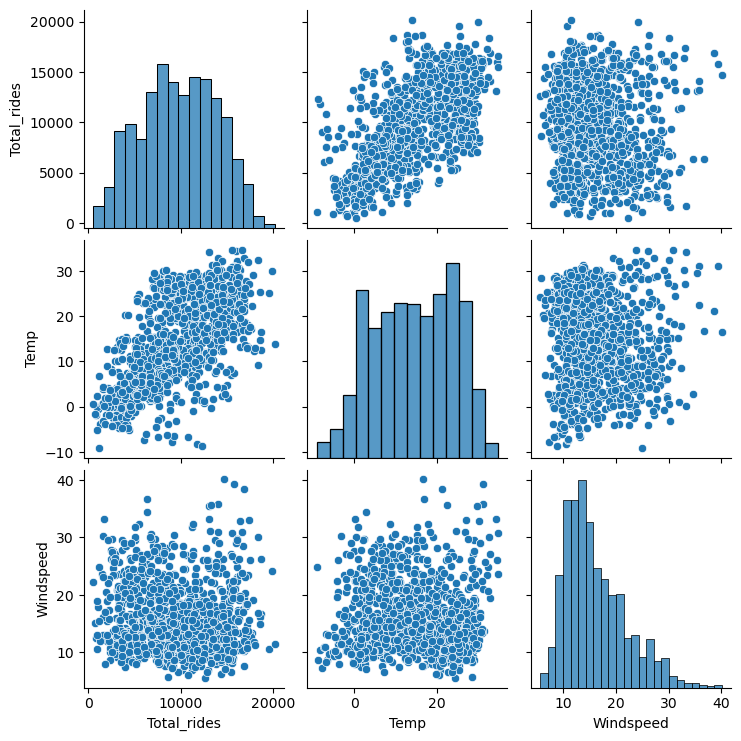

In [116]:
# Pair plot: Visualize relationships between multiple features
plot = plt.figure(figure = (8,6))
sns.pairplot(dfD[['Total_rides', 'Temp', 'Windspeed']])
plt.show()

In [117]:
dfD.columns

Index(['Casual', 'Date', 'Member', 'Total_rides', 'Apparenttemp', 'Temp',
       'weather', 'Windspeed', 'Month', 'Year', 'Count', 'Weekdays',
       'is_weekday', 'is_weekend', 'is_holiday', 'is_working_day', 'Season'],
      dtype='object')

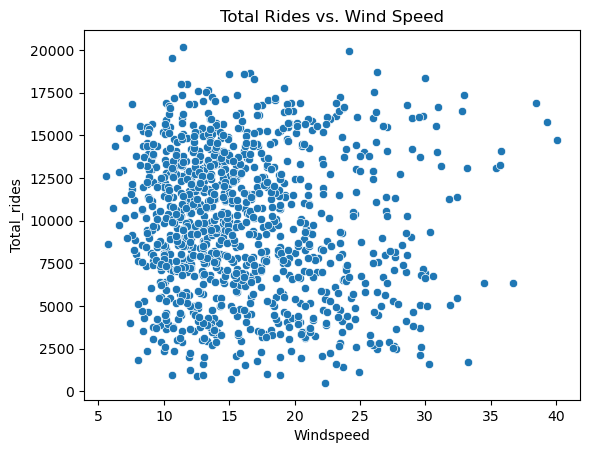

In [118]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfD)
plt.title('Total Rides vs. Wind Speed')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different years')]

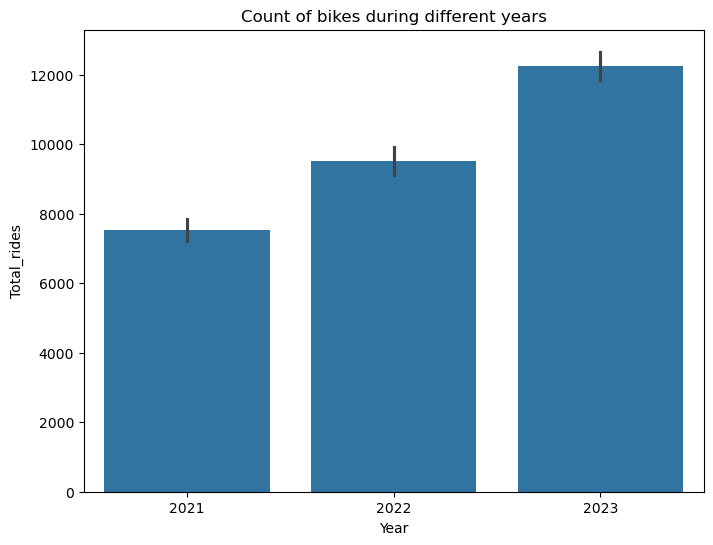

In [119]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different years')

[Text(0.5, 1.0, 'Total bike Rides during Weekdays')]

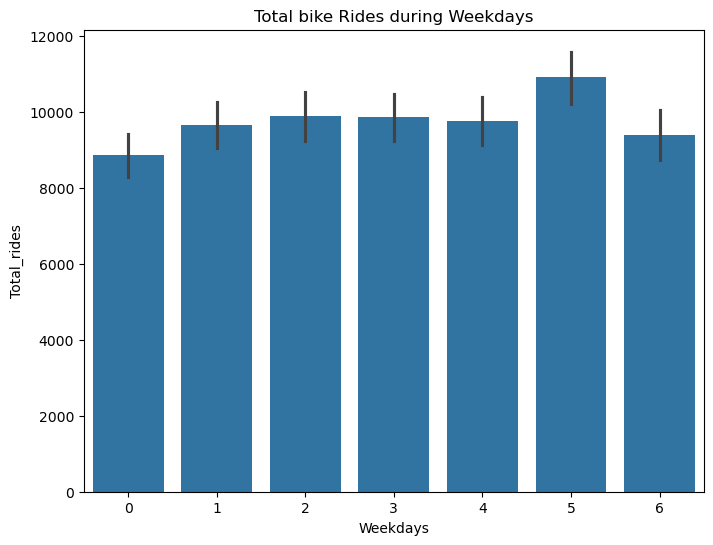

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Weekdays', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides during Weekdays')

[Text(0.5, 1.0, 'Total bike Rides in Season')]

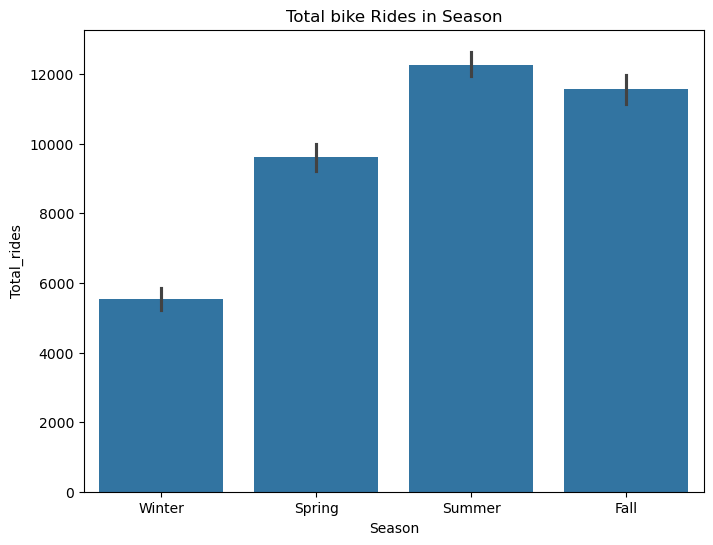

In [121]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfD, x='Season', y='Total_rides', ax=ax)
ax.set(title='Total bike Rides in Season')

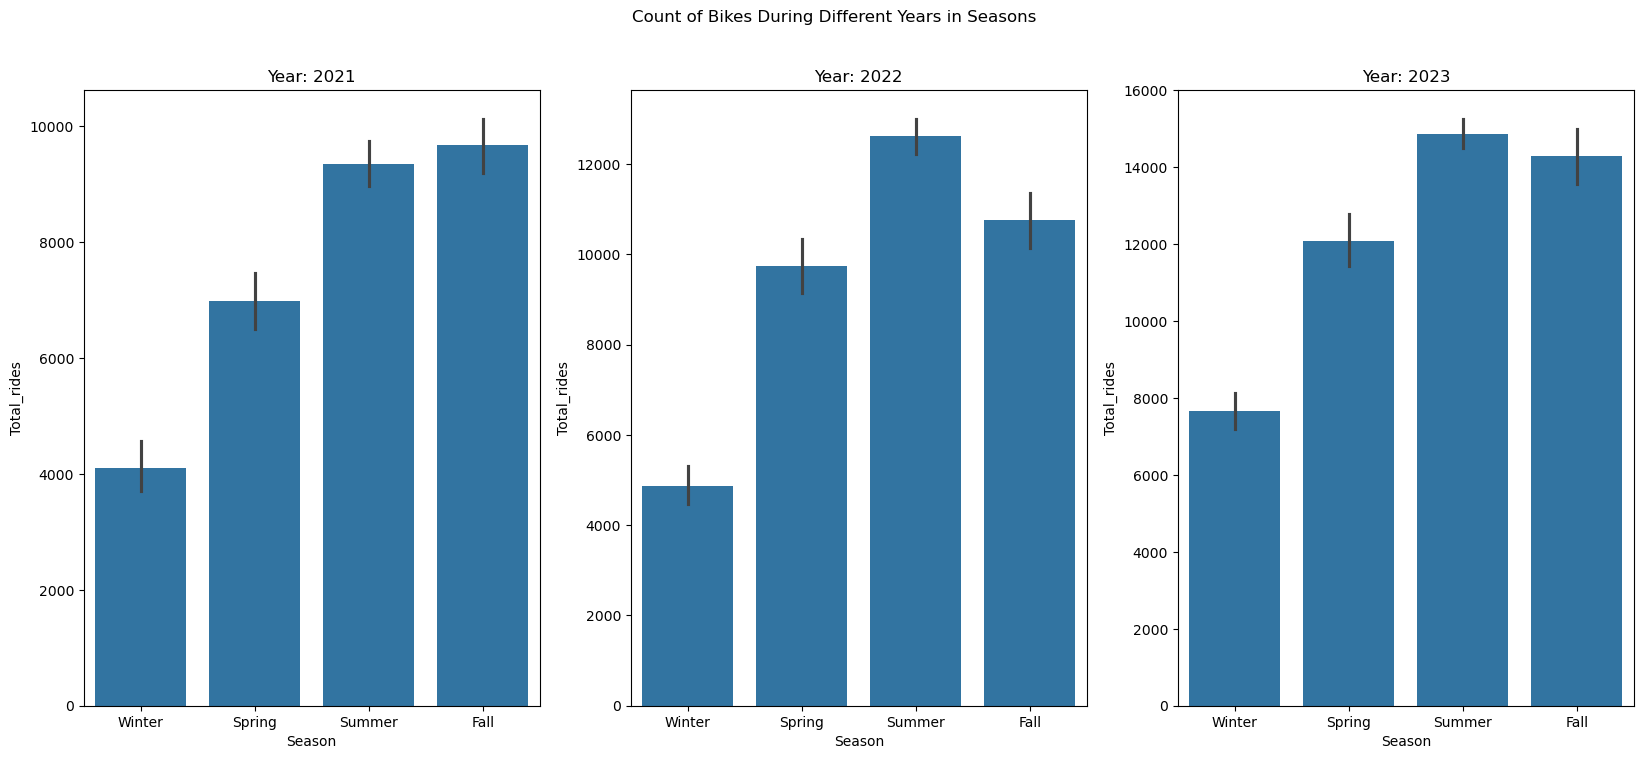

In [122]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('Count of Bikes During Different Years in Seasons')

for i, year in enumerate(dfD['Year'].unique()):
    year_data = dfD[dfD['Year'] == year]
    sns.barplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


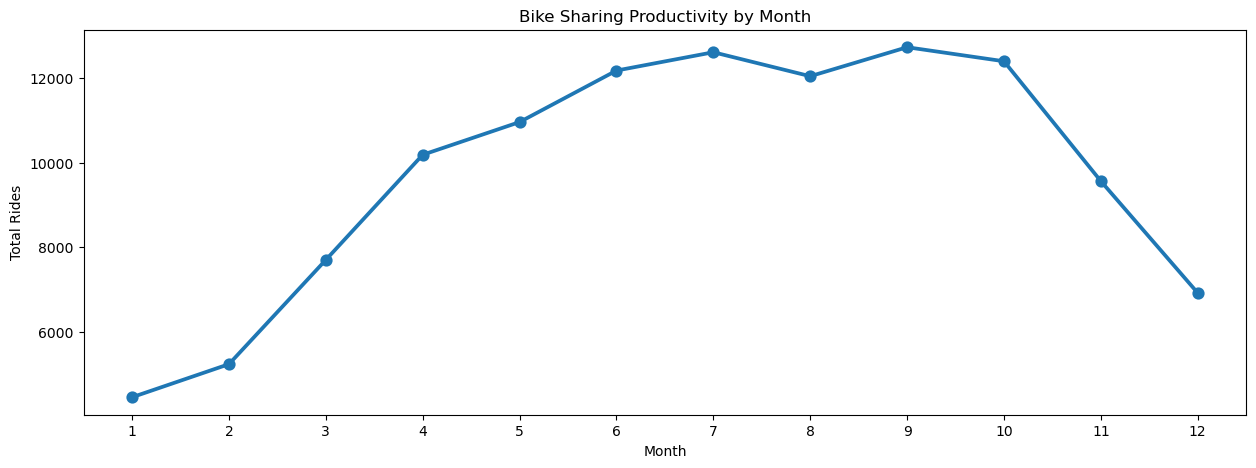

In [123]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=dfD, x='Month', y='Total_rides', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

In [124]:
dfD.head(4)

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,is_weekday,is_weekend,is_holiday,is_working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,True,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,False,True,False,False,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,False,True,False,False,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,True,False,False,True,Winter


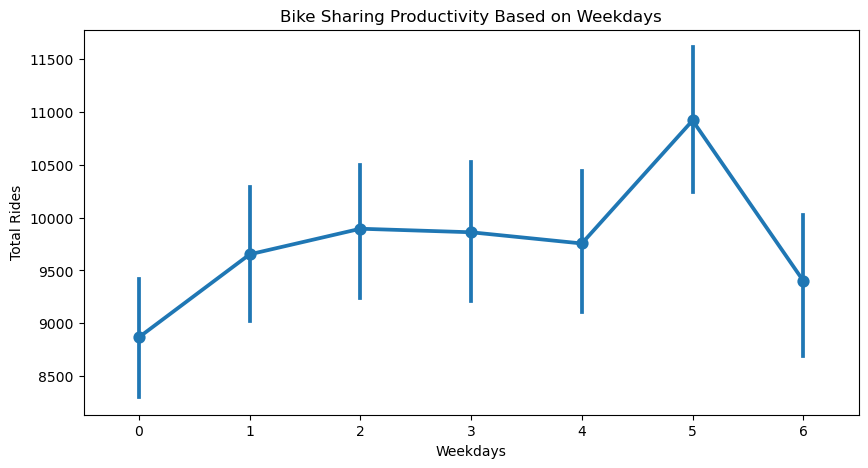

In [125]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=dfD, x='Weekdays', y='Total_rides', ax=ax)
ax.set(title='Bike Sharing Productivity Based on Weekdays')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Weekdays')
plt.show()

In [126]:
sum_casual_user = dfD.groupby("Weekdays").Casual.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,Weekdays,Casual
0,5,840122
1,6,705820
2,4,599988
3,3,536729
4,2,515054
5,1,503873
6,0,499617


In [127]:
sum_registered_user = dfD.groupby("Weekdays").Member.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,Weekdays,Member
0,2,1028673
1,1,1002029
2,3,1001762
3,4,931709
4,0,883785
5,5,874508
6,6,770328


In [128]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="Weekdays",
    right_on="Weekdays"
)
daily_user

,Weekdays,Casual,Member
0,5,840122,874508
1,6,705820,770328
2,4,599988,931709
3,3,536729,1001762
4,2,515054,1028673
5,1,503873,1002029
6,0,499617,883785


In [129]:
daily_user_type = daily_user.melt(id_vars='Weekdays', var_name='User_type', value_name='user_count')
daily_user_type

,Weekdays,User_type,user_count
0,5,Casual,840122
1,6,Casual,705820
2,4,Casual,599988
3,3,Casual,536729
4,2,Casual,515054
5,1,Casual,503873
6,0,Casual,499617
7,5,Member,874508
8,6,Member,770328
9,4,Member,931709


In [130]:
dfD.head()

,Casual,Date,Member,Total_rides,Apparenttemp,Temp,weather,Windspeed,Month,Year,Count,Weekdays,is_weekday,is_weekend,is_holiday,is_working_day,Season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,2021,0,4,True,False,False,True,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,1,2021,1,5,False,True,False,False,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,1,2021,2,6,False,True,False,False,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,1,2021,3,0,True,False,False,True,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,4,1,True,False,False,True,Winter


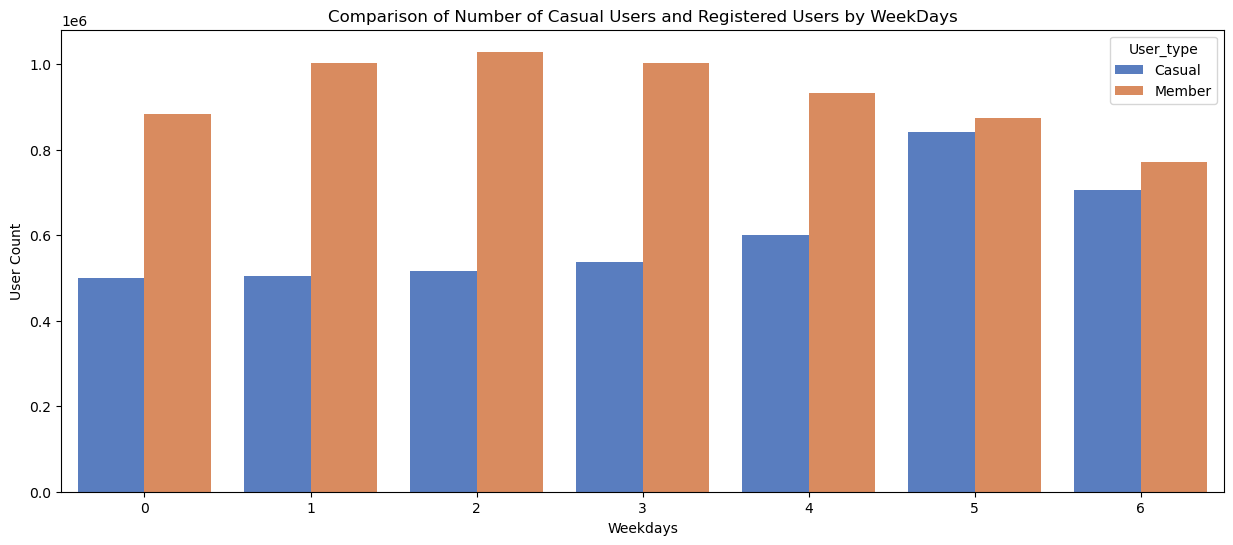

In [132]:
plt.figure(figsize=(15, 6))


sns.barplot(x="Weekdays", y="user_count", hue="User_type", data=daily_user_type, palette="muted")
plt.ylabel('User Count')
plt.xlabel('Weekdays' )
plt.title("Comparison of Number of Casual Users and Registered Users by WeekDays")
plt.show()